**Exploring and Analyzing Movie Data**

In this notebook, we will be delving into a dataset sourced from Kaggle. Our goal is to uncover insights, patterns, or dispel a few cinematic myths.

**Dataset Overview**

Our dataset is a rich source of information about movies. From release dates to box office numbers and is formatted pretty well already

**Roadmap**

We will follow a structured path:

Data Loading: We will start by loading the dataset into our notebook, getting a glimpse of the raw data and understanding its structure.

Data Cleaning: We'll perform the necessary cleaning steps to ensure our analysis is based on reliable and accurate information.

Exploratory Data Analysis (EDA): Armed with clean data, we will conduct an in-depth exploration. What genres dominate the charts? Are there any trends in movie releases over the years? Let's find out!

Hypothesis Testing:  We'll formulate hypotheses about the movie industry. We'll put these hypotheses to the test.

Visualization: Will leverage tools like Matplotlib and Seaborn to create compelling charts and graphs that will help us communicate our findings effectively.

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Now we need to read in the data
df = pd.read_csv(r'C:\Users\adil\Documents\covid-19_DA\movies.csv')


In [144]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [145]:
#We need to see if we have any missing data
#Looping through columns in a DataFrame to calculate and print the percentage of missing values for each column


for x in df.columns:
    pct_missing = np.mean(df[x].isnull())
    print('{} - {}%'.format(x, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [146]:
#Datatypes for the columns
(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

We want to change the formatting of a couple columns, so lets start with gross and budget.
Can use the pd.to_numeric function with the errors='coerce' parameter to convert non-numeric values to NaN, and then handle NaN values 

In [147]:

#df['budget'] = df['budget'].astype('int64')
#df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64', errors='ignore')
df['gross'] = df['gross'].astype('int64', errors='ignore')

There are some inconsistencies, like year and released columns not matching.
So we will create a new column as the go-to for year stats, might drop the others at later stage

In [148]:

df['correctyear'] =df['year'].astype(str).str[:4]

In [149]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [150]:
#want to order in highest grossing order
#df.sort_values(by=['gross'],inplace=False, ascending=False)

In [151]:
#Set pandas option to display all rows in a DataFrame without truncation
pd.set_option('display.max_rows', None)

In [152]:
#now we need to drop any duplicates. starting with company
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [153]:
# drop any duplicates
#df.drop_duplicates()

## Visualization
**We are now going to delve deeper into the data**

 - Hypthesis 1: high correclation between budget on film and profit made on film
 - Hypothesis 2: size of company (e.g. disney) has correlation with profit made on film

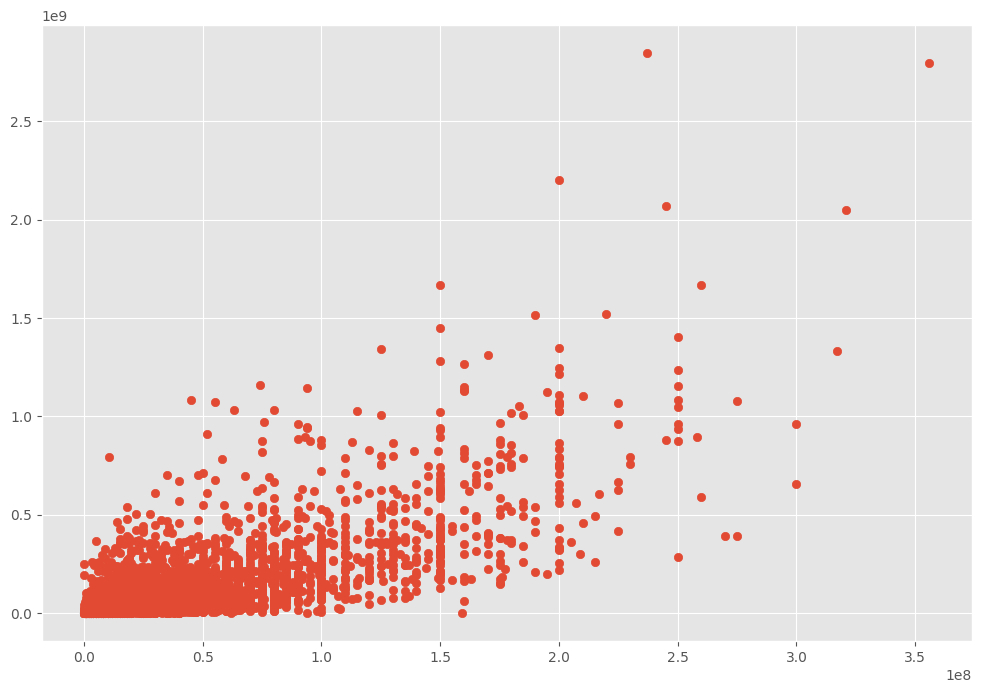

In [155]:
#scatter plot with budget v gross
plt.scatter(x=df['budget'],y=df['gross'])


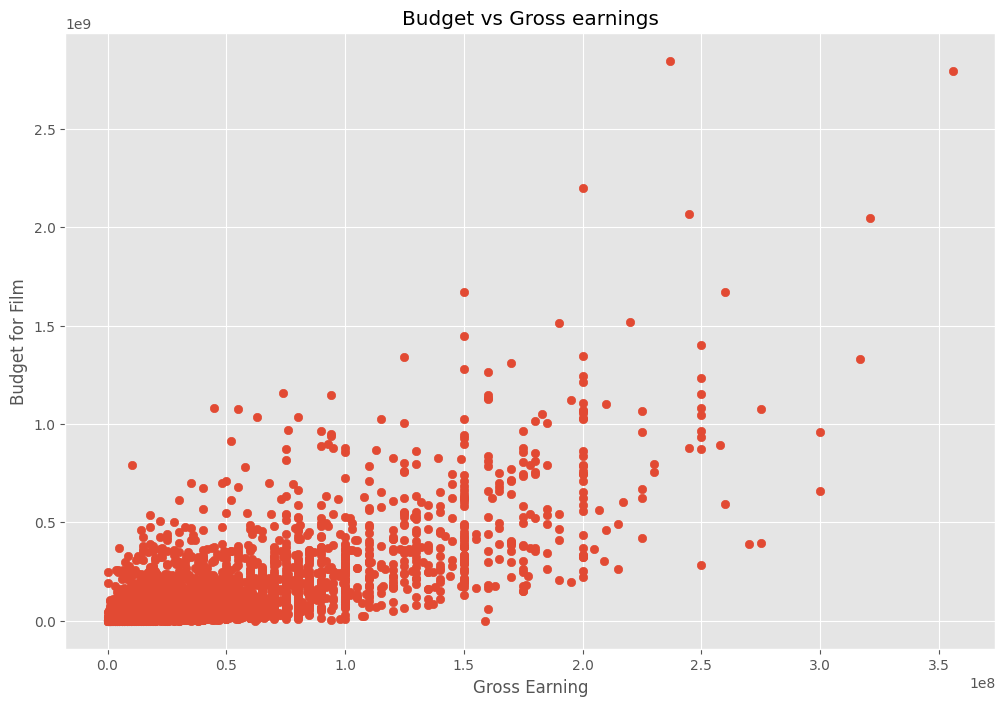

In [156]:
#going to add information to make it easier to follow

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

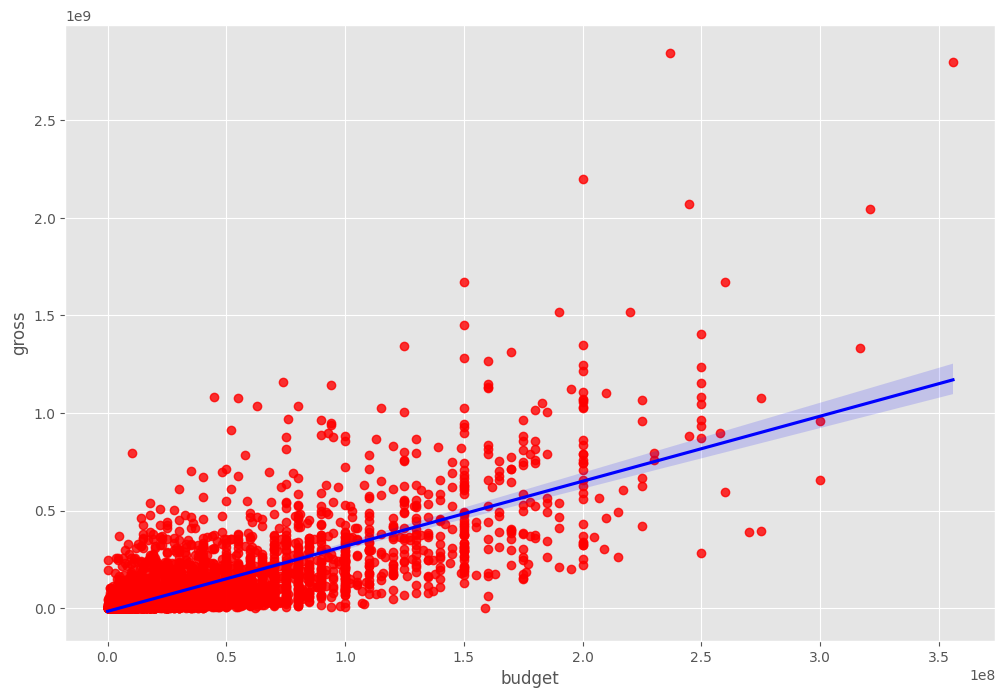

In [157]:
#there is somewhat a pattern but not enough to give us a clear picture
#will use a reg plot


#sns.regplot(x="budget", y="gross", data=df)
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

We can clearly see that the budget and gross are correlated. How much so, we can accurately say yet


In [158]:
#for some reason df.corr() doesn't seem to work due to issues with datatypes of the columns. So I chose to isolate 
#them before calculating correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

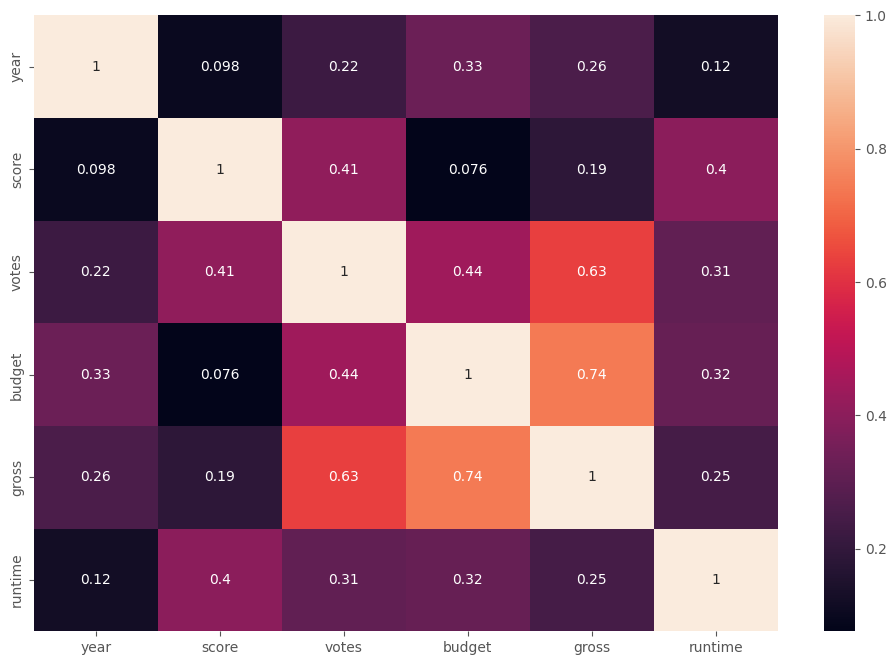

In [159]:
sns.heatmap(correlation_matrix, annot=True) 
plt.show

In [164]:
df_numerized = df.copy() 
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized[:9]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0,0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0,0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000.0,23402427.0,631,129.0,0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000.0,108185706.0,883,127.0,0


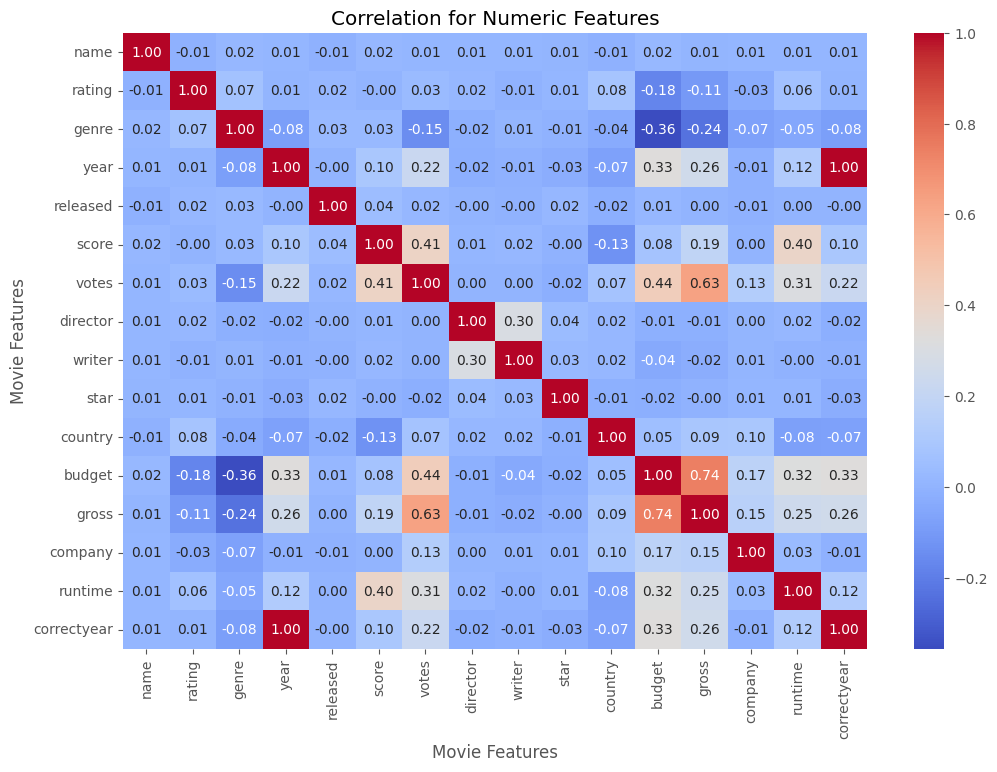

In [165]:
# Assuming df_numerized is your DataFrame containing only numeric columns
correlation_matrix = df_numerized.corr()

# Visualize the correlation matrix using seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [168]:
#now we make these numbers easier to view and understand
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             correctyear    0.011453
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [170]:
#even easier:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.356564
genre        budget        -0.356564
gross        genre         -0.235650
genre        gross         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.107339
gross        rating        -0.107339
year         genre         -0.081261
genre        year          -0.081261
             correctyear   -0.081261
correctyear  genre         -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
company      genre         -0.071067
genre        company       -0.071067
year         country       -0.070938
country      year          -0.070938
correctyear  country       -0.070938
country      correctyear   -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
budget       writer        -0.039451
w

In [173]:
#the following shows the pairs that have the highest correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
name         name           1.000000
company      company        1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
runtime      runtime        1.000000
votes        votes          1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
director     director       1.000000
correctyear  correctyear    1.000000
             year           1.000000
year         correctyear    1.000000
dtype: float64

## Conclusion
As we set out to find out which factors had the highest correlation with gross earnings, we found:
 
 - Votes and Budget have the highest correlation to gross earnings
 - Company has low correlation
 - Our initial hypothesis was wrong